# review_ML/DL

* 다음의 데이터를 이용하여 모델링 복습을 해 봅시다.
    * 데이터와 기본 라이브러리만 작성되어 있습니다.
    * 전처리와 모델링의 틀을 제공합니다.
    * 여러분이 가장 자신 있는 알고리즘을 이용하여 모델링하시오.
        * 가능하다면 튜닝도 시도하시오.
    * 성능 평가를 합니다.

## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Duration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


* Target : Creditability
* 숫자형변수 : Duration, CreditAmount, Age
* 범주형변수 : 나머지

## 2.데이터 준비


### 1) x, y로 나누기 

In [3]:
data.shape

(1000, 17)

In [4]:
target = 'Creditability'
x = data.drop(target, axis=1)
y = data.loc[:, target]
x.shape, y.shape

((1000, 16), (1000,))

### 2) 가변수화

In [5]:
list(x)

['AccountBalance',
 'Duration',
 'Payment',
 'Purpose',
 'CreditAmount',
 'Employment',
 'SexMarital',
 'CurrentAddress',
 'MostValuableAsset',
 'Age',
 'Apartment',
 'CreditCount',
 'Occupation',
 'Dependents',
 'Telephone',
 'ForeignWorker']

In [6]:
# dumm_cols = ['Payment', 'Purpose', 'SexMarital', 'MostValuableAsset', 'Apartment', 'Occupation', 'Telephone', 'ForeignWorker']
num_cols = ['Duration', 'CreditAmount', 'Age']
dumm_cols = [i for i in list(x) if i not in num_cols]

x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

x.head()

,Duration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Purpose_1,Purpose_2,...,Apartment_3,CreditCount_2,CreditCount_3,CreditCount_4,Occupation_2,Occupation_3,Occupation_4,Dependents_2,Telephone_2,ForeignWorker_2
0,24,1249,28,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9,276,22,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,18,1049,21,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,24,6419,44,0,0,0,0,1,1,0,...,1,1,0,0,0,0,1,1,1,0
4,12,1424,55,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### 3) train : validation 분할

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, random_state=20)

### 4) 스케일링

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(train_x)
train_x_s = mm_scaler.transform(train_x)
val_x_s = mm_scaler.transform(val_x)

## 3.모델링
* 최소 3가지의 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도하시오.
* validation 셋으로 예측결과를 저장하시오.

In [50]:
# 사용될 라이브러리, 함수 로딩
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
result = {}

### 1) 모델1

In [65]:
model = RandomForestClassifier(random_state=20)
model.fit(train_x, train_y)
y_pred = model.predict(val_x)

In [66]:
val_acc = accuracy_score(val_y, y_pred)
print("val acc :", val_acc)
print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y, y_pred))

val acc : 0.72
[[ 26  45]
 [ 11 118]]
              precision    recall  f1-score   support

           0       0.70      0.37      0.48        71
           1       0.72      0.91      0.81       129

    accuracy                           0.72       200
   macro avg       0.71      0.64      0.64       200
weighted avg       0.72      0.72      0.69       200



In [67]:
result['RandomForest'] = val_acc

### 2) 모델2

In [21]:
model = LGBMClassifier(max_depth = 5, random_state=20)
model.fit(train_x, train_y)
y_pred = model.predict(val_x)

In [22]:
val_acc = accuracy_score(val_y, y_pred)
print("val acc :", val_acc)
print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y, y_pred))
result['LGBM'] = val_acc

val acc : 0.735
[[ 35  36]
 [ 17 112]]
              precision    recall  f1-score   support

           0       0.67      0.49      0.57        71
           1       0.76      0.87      0.81       129

    accuracy                           0.73       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.73      0.73      0.72       200



### 3) 모델3

In [70]:
params = {'learning_rate' : np.linspace(0.01, 0.5, 50), 'n_estimators' : [150]}

model = GridSearchCV(XGBClassifier(), params, cv=5, verbose=2)
model.fit(train_x, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.02, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.02, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.02, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.02, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.02, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.03, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.03, n_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                         'n_estimators': [150]},
             verbose=2)

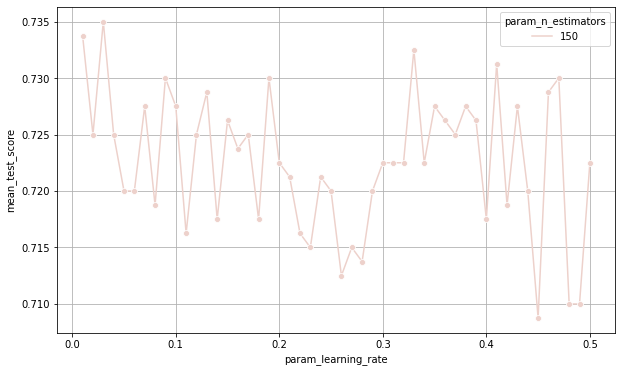

In [72]:
res = pd.DataFrame(model.cv_results_)

plt.figure(figsize = (10, 6))
sns.lineplot(x = 'param_learning_rate', y = 'mean_test_score', data = res,
             marker = 'o', hue = 'param_n_estimators')
plt.grid()
plt.show()

In [73]:
y_pred = model.predict(val_x_s)
acc = accuracy_score(val_y, y_pred)
result['XGB'] = acc

### 4) 모델4

In [57]:
params = {'n_neighbors' : range(3, 100, 2), 'metric' : ['manhattan', 'euclidean']}

model = GridSearchCV(KNeighborsClassifier(), params, cv=5)
model.fit(train_x_s, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(3, 100, 2)})

In [58]:
model.best_params_, model.best_score_

({'metric': 'euclidean', 'n_neighbors': 15}, 0.73)

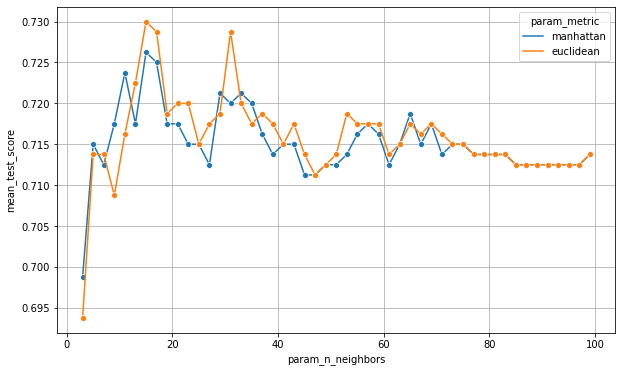

In [59]:
res = pd.DataFrame(model.cv_results_)

plt.figure(figsize = (10, 6))
sns.lineplot(x = 'param_n_neighbors', y = 'mean_test_score', data = res,
             marker = 'o', hue = 'param_metric')
plt.grid()
plt.show()

In [60]:
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001139,0.000158,0.012916,0.003411,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.68750,0.68750,0.65625,0.75000,0.71250,0.69875,0.031225,97
1,0.001052,0.000159,0.011345,0.000626,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.73750,0.72500,0.68125,0.73750,0.69375,0.71500,0.023251,47
2,0.000828,0.000145,0.010658,0.000361,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.76250,0.69375,0.68750,0.73750,0.68125,0.71250,0.031869,92
3,0.000850,0.000045,0.010855,0.000136,manhattan,9,"{'metric': 'manhattan', 'n_neighbors': 9}",0.72500,0.70625,0.71875,0.71875,0.71875,0.71750,0.006124,20
4,0.000808,0.000075,0.010763,0.000206,manhattan,11,"{'metric': 'manhattan', 'n_neighbors': 11}",0.75625,0.70625,0.71250,0.72500,0.71875,0.72375,0.017410,6


In [61]:
y_pred = model.predict(val_x_s)
acc = accuracy_score(val_y, y_pred)
result['KNN'] = acc

### 5) 모델5

In [62]:
params = {'C' : [1, 10, 20, 30], 'gamma' : np.linspace(0.001, 0.2, 50)}

model = GridSearchCV(SVC(), params, cv=5)
model.fit(train_x_s, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30],
                         'gamma': array([0.001     , 0.00506122, 0.00912245, 0.01318367, 0.0172449 ,
       0.02130612, 0.02536735, 0.02942857, 0.0334898 , 0.03755102,
       0.04161224, 0.04567347, 0.04973469, 0.05379592, 0.05785714,
       0.06191837, 0.06597959, 0.07004082, 0.07410204, 0.07816327,
       0.08222449, 0.08628571, 0.09034694, 0.09440816, 0.09846939,
       0.10253061, 0.10659184, 0.11065306, 0.11471429, 0.11877551,
       0.12283673, 0.12689796, 0.13095918, 0.13502041, 0.13908163,
       0.14314286, 0.14720408, 0.15126531, 0.15532653, 0.15938776,
       0.16344898, 0.1675102 , 0.17157143, 0.17563265, 0.17969388,
       0.1837551 , 0.18781633, 0.19187755, 0.19593878, 0.2       ])})

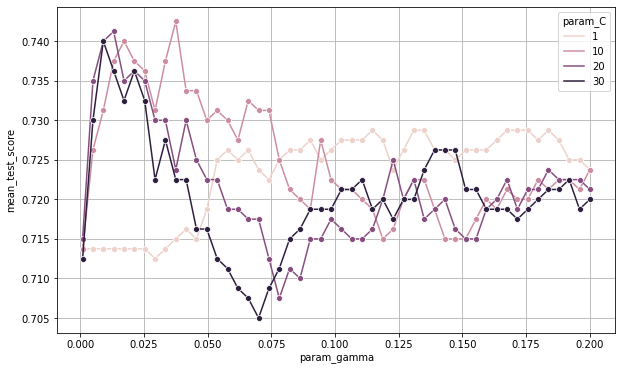

In [63]:
res = pd.DataFrame(model.cv_results_)

plt.figure(figsize = (10, 6))
sns.lineplot(x = 'param_gamma', y = 'mean_test_score', data = res,
             marker = 'o', hue = 'param_C')
plt.grid()
plt.show()

In [64]:
y_pred = model.predict(val_x_s)
acc = accuracy_score(val_y, y_pred)
result['SVM'] = acc

### 딥러닝

In [74]:
from tensorflow import keras

In [75]:
train_x_s.shape

(800, 41)

In [77]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(41, ))
hl = keras.layers.Dense(512, activation='relu')(il)
hl = keras.layers.Dense(256, activation='relu')(hl)
hl = keras.layers.Dense(128, activation='relu')(hl)
ol = keras.layers.Dense(1, activation='sigmoid')(hl)

model = keras.models.Model(il, ol)

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model

## 4.모델 성능 비교
* 모델 중 성능이 가장 좋은 모델은?

In [39]:
result

{'RandomForest': 0.68, 'LGBM': 0.735, 'XGB': 0.745}

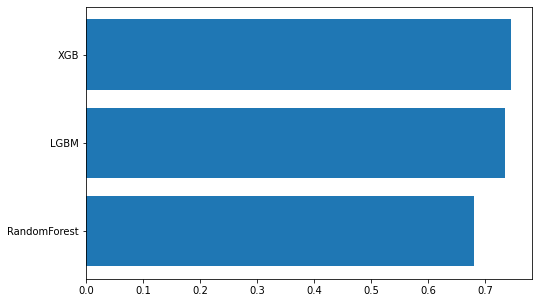

In [38]:
# 데이터프레임 만들기 
perf_dic = {'model':list(result), 'val_acc': result.values()}
df = pd.DataFrame(perf_dic)
df.sort_values(by='val_acc', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(8, 5))
plt.barh(df['model'], df['val_acc'])
plt.show()